___

QTW Case 7

#### Rick Fontenot
___


In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)
import missingno as msno


### Load the raw data


In [2]:
anonymized=pd.read_csv("/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/QTW/Case Study 7/final_project(5).csv")

anonymized.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,asia,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,asia,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,asia,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


### 160,000 records, 50 features plus target "y"

In [3]:
anonymized.shape

(160000, 51)

### All features have at least 1 missing value, but highest feature missing is 41 or 0.026%
### Since we have no information about features and it's a low percentage, drop missing values instead of imputing

In [4]:
missing = pd.DataFrame(anonymized.isna().sum())
missing.head()

,0
x0,26
x1,25
x2,38
x3,37
x4,26


In [5]:
anonymized = anonymized.dropna()
anonymized.isna().sum()


x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
y      0
dtype: int64

In [6]:
anonymized.shape

(158392, 51)

After removing rows with missing values, there are 158,392 records (1,608 records dropped)

### There are no duplicate rows

In [7]:
# Check for duplicate rows
print('Duplicate rows: ',anonymized.duplicated(keep='first').sum())

Duplicate rows:  0


### Data Types and processing needed

The target is int64, and all features are floats except:

x24 : appears to be strings with names of continents or reagions of globe, not ordinal, so needs 1-hot encoding

x29 : Month, not clear if all in same year or not, may need eda to check ordinal vs. 1-hot

x30 : Day of the week, may need eda to check ordinal vs. 1-hot or biining based on weekdays etc.

x32 : Includes a % sign at end, needs to be dropped, maybe multiply by 100 before scaling with other variables

x37 : Starts with a $ which needs to be removed, not that some are negative and that needs to be preserved


In [8]:
anonymized.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32     object
x33    float64
x34    float64
x35    float64
x36    float64
x37     object
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
y        int64
dtype: object

x24 : appears to be strings with names of continents or reagions of globe, not ordinal, so needs 1-hot encoding

In [9]:
anonymized.x24.unique()

array(['euorpe', 'asia', 'america'], dtype=object)

x24 has 3 unique values 'euorpe', 'asia', 'america'
These are not ordinal, so one-hot encode them

In [10]:
# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(anonymized.x24,drop_first=True)

#concating dummies to the data frame
anonymized = pd.concat([anonymized,dummies],axis=1)

#dropping original columns
anonymized = anonymized.drop('x24',axis=1)

anonymized.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,asia,euorpe
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,1
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,1,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,1,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,1,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,1,0


x29 : Month, not clear if all in same year or not, may need eda to check ordinal vs. 1-hot


In [11]:
print(anonymized.groupby('x29').size())

x29
Apr         6699
Aug        29115
Dev           23
Feb          139
January        9
July       45122
Jun        40900
Mar         1221
May        21708
Nov          331
Oct         2385
sept.      10740
dtype: int64


In [12]:
anonymized['month'] = np.where(
    anonymized['x29'] == 'Apr', 4, np.where(
        anonymized['x29'] == 'Aug', 8, np.where(
            anonymized['x29'] == 'Dev', 12, np.where(
                anonymized['x29'] == 'Feb', 2, np.where(
                    anonymized['x29'] == 'January', 1, np.where(
                        anonymized['x29'] == 'July', 7, np.where(
                            anonymized['x29'] == 'Jun', 6, np.where(
                                anonymized['x29'] == 'Mar', 3, np.where(
                                    anonymized['x29'] == 'May', 5, np.where(
                                        anonymized['x29'] == 'Nov', 11, np.where(
                                            anonymized['x29'] == 'Oct', 10, np.where(
                                                anonymized['x29'] == 'sept.', 9, -1))))))))))))

anonymized.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,asia,euorpe,month
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,1,7
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,1,0,8
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,1,0,7
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,1,0,7
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,1,0,7


<AxesSubplot:xlabel='month', ylabel='Avg_Y'>

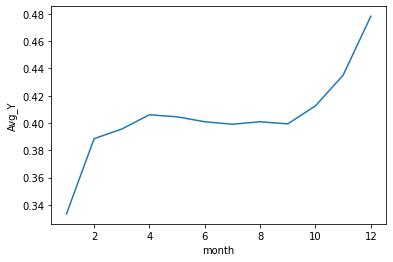

In [13]:
df1 = anonymized.groupby('month')['y'].mean().reset_index(name='Avg_Y')
sns.lineplot(data=df1, x="month", y="Avg_Y")


Proportion of Y=1 does have increasing rate through the year, keep month as ordinal rather than categorical encoding.

Drop original feature x29

In [14]:
anonymized = anonymized.drop('x29',axis=1)
anonymized.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,asia,euorpe,month
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,-0.801340,1.142950,1.005131,-18.473784,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,1,7
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,0.818792,-0.642987,0.751086,3.749377,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,1,0,8
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,-0.718315,-0.566757,4.171088,11.522448,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,1,0,7
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,-0.052430,-0.558582,9.215569,30.595226,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,1,0,7
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,-0.223449,0.350781,1.811182,-4.094084,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,1,0,7


x30 : Day of the week, may need eda to check ordinal vs. 1-hot or biining based on weekdays etc.

In [15]:
print(anonymized.groupby('x30').size())

x30
friday          556
monday          484
thurday       29164
tuesday       27690
wednesday    100498
dtype: int64


In [16]:
anonymized['weekday'] = np.where(
    anonymized['x30'] == 'friday', 5, np.where(
        anonymized['x30'] == 'monday', 1, np.where(
            anonymized['x30'] == 'thurday', 3, np.where(
                anonymized['x30'] == 'tuesday', 2, np.where(
                    anonymized['x30'] == 'wednesday', 3, -1)))))


anonymized.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,asia,euorpe,month,weekday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,-0.801340,1.142950,1.005131,-18.473784,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,1,7,2
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,0.818792,-0.642987,0.751086,3.749377,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,1,0,8,3
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,-0.718315,-0.566757,4.171088,11.522448,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,1,0,7,3
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,-0.052430,-0.558582,9.215569,30.595226,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,1,0,7,3
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,-0.223449,0.350781,1.811182,-4.094084,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,1,0,7,2


<AxesSubplot:xlabel='weekday', ylabel='Avg_Y'>

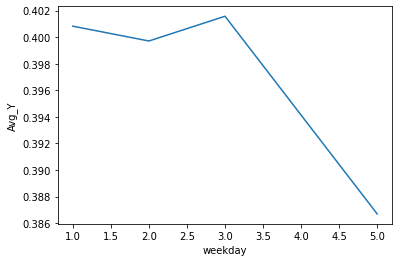

In [17]:
df2 = anonymized.groupby('weekday')['y'].mean().reset_index(name='Avg_Y')
sns.lineplot(data=df2, x="weekday", y="Avg_Y")

Proportion of Y=1 does have decreasing rate through the week, keep weekday as ordinal rather than categorical encoding.

Drop original feature x30

In [18]:
anonymized = anonymized.drop('x30',axis=1)
anonymized.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,asia,euorpe,month,weekday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,-0.801340,1.142950,1.005131,-18.473784,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,1,7,2
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,0.818792,-0.642987,0.751086,3.749377,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,1,0,8,3
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,-0.718315,-0.566757,4.171088,11.522448,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,1,0,7,3
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,-0.052430,-0.558582,9.215569,30.595226,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,1,0,7,3
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,-0.223449,0.350781,1.811182,-4.094084,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,1,0,7,2


x32: remove % and convert to float then multiply by 100 before any future scaling

In [19]:
print(anonymized.x32[0:2])
anonymized.x32 = anonymized.x32.replace('[\%,]', '', regex=True).astype(float)
anonymized.x32 = anonymized.x32 * 100
print(anonymized.x32[0:2])

0      0.0%
1    -0.02%
Name: x32, dtype: object
0    0.0
1   -2.0
Name: x32, dtype: float64


x37: remove $ and convert to float

In [20]:
print(anonymized.x37[0:2])
anonymized.x37 = anonymized.x37.replace('[\$,]', '', regex=True).astype(float)
print(anonymized.x37[0:2])


0    $1313.96
1    $1962.78
Name: x37, dtype: object
0    1313.96
1    1962.78
Name: x37, dtype: float64


In [21]:
anonymized.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,asia,euorpe,month,weekday
count,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000
mean,-0.000808,0.003705,-1.148314,-0.023012,-0.000266,0.013282,-1.669562,-7.697877,-0.028853,0.004320,0.000816,0.030692,-1.337022,0.005699,0.008887,0.002436,0.006746,0.012607,0.014051,0.021573,0.298973,-0.027341,0.007413,0.726195,-0.001621,-0.001013,-0.003656,0.030159,-0.007546,-0.000953,-0.007019,-0.001261,0.000049,0.006182,0.502723,6.063752,0.003466,-2.318750,6.706030,-1.832959,-0.002174,-0.007254,0.000996,-12.751993,0.028262,0.000160,-0.672052,0.401195,0.868705,0.103402,6.678917,2.826090
std,0.371064,6.340297,13.274738,8.066624,6.383306,7.672102,19.300472,30.541562,8.904048,6.354359,7.870963,8.767797,14.752763,8.952626,6.964429,3.271402,4.982869,7.570453,4.540760,7.594895,5.803957,9.410971,5.412217,14.908566,1.263860,0.843154,6.773700,14.437525,2.767239,1.039742,1.747829,8.012550,2.379169,1.592854,999.670281,16.886960,5.134009,17.040216,18.675642,5.110079,1.535282,4.163766,0.396604,36.608634,4.787974,1.935087,15.033134,0.490142,0.337723,0.304484,1.363430,0.413328
min,-1.592635,-26.278302,-59.394048,-33.864827,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,-36.306571,-38.092869,-64.197967,-38.723514,-30.905214,-17.002359,-26.042983,-34.395898,-20.198686,-35.633396,-26.677396,-43.501854,-23.644193,-66.640341,-6.364653,-3.857484,-32.003555,-72.896705,-12.289364,-5.000000,-7.451454,-36.116606,-10.008149,-6.866024,-4734.540000,-74.297559,-22.101647,-74.059196,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000,0.000000,0.000000,1.000000,1.000000
25%,-0.251246,-4.259016,-10.166609,-5.453044,-4.313987,-5.152419,-14.781485,-27.315875,-6.034094,-4.260304,-5.286455,-5.902750,-11.383333,-6.030792,-4.695374,-2.207028,-3.343254,-5.070818,-3.054185,-5.105826,-3.605254,-6.360632,-3.649892,-9.260850,-0.853516,-0.566752,-4.596859,-9.700474,-1.875986,-1.000000,-1.184854,-5.403326,-1.610630,-1.068702,-690.690000,-5.246467,-3.458830,-13.952620,-5.802178,-5.159340,-1.039992,-2.814168,-0.266369,-36.432779,-3.216974,-1.320800,-10.929046,0.000000,1.000000,0.000000,6.000000,3.000000
50%,-0.001818,0.010023,-1.342199,-0.028470,-0.001138,0.015135,-1.951457,-6.959275,-0.016173,0.003098,-0.019074,0.013579,-1.627464,-0.004343,0.003644,0.005473,0.012754,0.024699,0.017192,0.040295,0.432127,-0.016830,0.009153,1.035878,-0.004934,-0.001314,0.035506,0.244454,-0.000218,0.000000,-0.006598,-0.015421,-0.003761,0.004384,-13.320000,6.192058,0.017274,-2.709284,6.847926,-1.922935,-0.004279,-0.012278,0.001841,-12.975088,0.036234,-0.011800,-0.569139,0.000000,1.000000,0.000000,7.000000,3.000000
75%,0.248622,4.286606,7.878130,5.448332,4.308644,5.191172,11.454209,12.215119,5.978646,4.303807,5.327598,5.933786,8.375380,6.039018,4.702776,2.212473,3.366107,5.102171,3.073832,5.158919,4.303770,6.318381,3.672444,11.031540,0.850890,0.567379,4.647103,9.934612,1.854836,1.000000,1.179054,5.411490,1.602599,1.079242,664.050000,17.424261,3.462758,8.972837,19.269855,1.452018,1.033870,2.781096,0.269194,11.445524,3.269134,1.318161,9.649839,1.000000,1.000000,0.000000,8.000000,3.000000
max,1.6008

Most features have mean centered at 0 or 1 but also have wide ranges with standard deviation > 1.

Scale/Standardize features prior to modeling

Categorical variables to exclude from scaling:
y, asia, europe

In [22]:
anonymized.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,asia,euorpe,month,weekday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,-0.801340,1.142950,1.005131,-18.473784,-3.851669,0.0,-1.940031,-5.492063,0.627121,-0.873824,1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,1,7,2
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,0.818792,-0.642987,0.751086,3.749377,1.391594,-2.0,2.211462,-4.460591,1.035461,0.228270,1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,1,0,8,3
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,-0.718315,-0.566757,4.171088,11.522448,-3.262082,-1.0,0.419607,-3.804056,-0.763357,-1.612561,430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,1,0,7,3
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,-0.052430,-0.558582,9.215569,30.595226,-2.285241,1.0,-3.442715,4.420160,1.164532,3.033455,-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,1,0,7,3
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,-0.223449,0.350781,1.811182,-4.094084,0.921047,1.0,-0.431640,12.165494,-0.167726,-0.341604,-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,1,0,7,2


In [23]:
#fix error on spelling in europe column
anonymized.rename(columns = {'euorpe':'europe'}, inplace = True)


In [24]:
scaling_exclusions = ['y', 'asia','europe']

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(anonymized.drop(scaling_exclusions, axis=1))
anonymized_scaled = scl_obj.transform(anonymized.drop(scaling_exclusions, axis=1))

anonymized_scaled = pd.DataFrame(anonymized_scaled, index=anonymized.drop(scaling_exclusions, axis=1).index, columns=anonymized.drop(scaling_exclusions, axis=1).columns)


anonymized_scaled.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,month,weekday
count,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05
mean,-1.668783e-17,1.749531e-18,-6.370086e-18,6.056068e-18,6.358871e-18,1.417568e-17,3.633641e-18,1.419811e-17,1.069905e-17,1.647475e-17,8.792513e-18,-2.063549e-18,-2.319250e-17,-2.408969e-17,-2.799249e-17,2.198128e-17,7.222422e-18,-1.534204e-17,3.140183e-19,-3.454202e-18,4.441116e-18,-1.256073e-17,-2.691586e-17,-2.435885e-17,-1.188784e-18,-1.096821e-17,8.433635e-18,-3.813080e-19,-2.108409e-18,-1.215700e-17,-9.061672e-18,-1.812334e-17,8.433635e-18,2.557006e-18,1.166354e-18,6.637002e-17,-8.971952e-20,1.729344e-17,1.520185e-16,5.006349e-17,1.839250e-18,-1.682241e-17,1.451213e-17,-6.684104e-17,5.854199e-18,1.561120e-17,2.041119e-17,1.984147e-16,-2.772109e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-4.289917e+00,-4.145246e+00,-4.387726e+00,-4.195302e+00,-4.459657e+00,-4.410314e+00,-4.387726e+00,-5.690922e+00,-4.229797e+00,-4.404074e+00,-4.612841e+00,-4.348148e+00,-4.260974e+00,-4.326031e+00,-4.438871e+00,-5.198030e+00,-5.227874e+00,-4.545119e+00,-4.451414e+00,-4.694612e+00,-4.647942e+00,-4.619571e+00,-4.370054e+00,-4.518660e+00,-5.034619e+00,-4.573877e+00,-4.724154e+00,-5.051219e+00,-4.438307e+00,-4.807982e+00,-4.259261e+00,-4.507361e+00,-4.206607e+00,-4.314411e+00,-4.736619e+00,-4.758794e+00,-4.305638e+00,-4.210080e+00,-4.758794e+00,-5.107724e+00,-4.477407e+00,-4.317315e+00,-4.423114e+00,-5.164777e+00,-4.409937e+00,-4.387575e+00,-4.331721e+00,-4.165182e+00,-4.418035e+00
25%,-6.749239e-01,-6.723241e-01,-6.793598e-01,-6.731502e-01,-6.757837e-01,-6.733119e-01,-6.793598e-01,-6.423397e-01,-6.744416e-01,-6.711357e-01,-6.717459e-01,-6.767334e-01,-6.809804e-01,-6.742726e-01,-6.754719e-01,-6.753898e-01,-6.723058e-01,-6.714843e-01,-6.757121e-01,-6.751133e-01,-6.726857e-01,-6.729710e-01,-6.757520e-01,-6.698885e-01,-6.740442e-01,-6.709818e-01,-6.780958e-01,-6.739842e-01,-6.752021e-01,-9.608628e-01,-6.738871e-01,-6.742027e-01,-6.769944e-01,-6.748189e-01,-6.914229e-01,-6.697626e-01,-6.743866e-01,-6.827324e-01,-6.697626e-01,-6.509472e-01,-6.759807e-01,-6.741307e-01,-6.741383e-01,-6.468654e-01,-6.777910e-01,-6.826378e-01,-6.822946e-01,-4.979492e-01,4.207579e-01
50%,-2.724042e-03,9.964953e-04,-1.460565e-02,-6.766200e-04,-1.364766e-04,2.414812e-04,-1.460565e-02,2.418360e-02,1.424076e-03,-1.923449e-04,-2.526970e-03,-1.951858e-03,-1.968737e-02,-1.121654e-03,-7.528869e-04,9.283455e-04,1.205676e-03,1.597362e-03,6.916687e-04,2.465170e-03,2.294191e-02,1.116942e-03,3.214291e-04,2.077225e-02,-2.621017e-03,-3.575499e-04,5.781520e-03,1.484296e-02,2.648298e-03,9.168944e-04,2.406200e-04,-1.767285e-03,-1.601536e-03,-1.128821e-03,-1.382733e-02,7.59

In [25]:
anonymized.shape

(158392, 52)

In [26]:
anonymized_scaled.shape

(158392, 49)

All features centered with mean=0 and standard deviation=1
Merge categorical features back to dataframe 

In [27]:
anonymized_scaled = pd.concat([anonymized_scaled,anonymized[scaling_exclusions]],axis=1)
anonymized_scaled.head()


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,month,weekday,y,asia,europe
0,-0.446704,-0.625413,0.434618,0.310530,-0.281966,0.103154,0.434618,-0.232213,-0.113636,-0.662424,0.786012,1.507890,1.830336,-0.561062,1.506923,-0.770349,0.423686,0.773182,-1.471170,0.233042,-0.380446,-0.181767,-0.466377,0.189611,-0.632761,1.356770,0.148927,-1.281660,-1.389159,0.000917,-1.105954,-0.685277,0.263568,-0.552473,1.313895,-0.439245,-1.010834,-0.486700,-0.439245,1.418187,-1.513395,0.403982,-0.669003,2.008642,-1.611952,0.078255,-0.490127,0.235497,-1.998638,0,0,1
1,-0.401783,-0.092958,2.183716,0.517609,1.006859,-0.318066,2.183716,0.031831,0.103916,0.051279,-1.487710,-0.271848,-1.604987,1.093974,-1.575094,0.458998,-0.482571,-1.230372,-0.443421,0.661458,-1.052554,1.152027,-0.089709,0.661662,0.649135,-0.761398,0.111423,0.257609,0.505610,-1.922643,1.269282,-0.556545,0.435200,0.139428,1.962931,1.584248,-1.003795,0.262097,1.584248,1.237534,0.498109,1.569237,2.538893,0.780083,-1.028610,-0.165596,1.156917,0.968944,0.420758,0,1,0
2,-0.864812,-0.226098,1.009430,0.819414,-0.830980,-1.476050,1.009430,0.614196,0.601384,-0.415040,0.199701,-0.479194,0.909366,-0.576838,1.047310,-0.670928,-0.817238,-1.015486,0.886986,-0.876276,0.241448,-0.254159,0.454549,-0.402240,-0.567070,-0.670987,0.616319,0.796004,-1.176098,-0.960863,0.244090,-0.474606,-0.320872,-1.016256,0.430110,-0.378811,1.699480,0.085422,-0.378811,2.137317,-0.447940,-0.654185,1.899140,1.191209,-1.557414,-1.080556,-0.478769,0.235497,0.420758,0,1,0
3,-0.659692,0.800119,-1.732719,0.453762,1.019236,0.296783,-1.732719,-0.367229,-0.034612,-0.876943,-0.254235,-2.203224,0.835938,-0.661269,0.359329,0.394305,-0.502449,-2.078556,-0.605503,0.144303,0.279930,-1.503763,0.270354,-0.819037,-0.040201,-0.661293,1.361037,2.117064,-0.823095,0.962697,-1.965700,0.551814,0.489451,1.900539,-2.367581,0.481137,-1.244358,0.845248,0.481137,-1.102690,1.916894,-1.541123,1.055918,-1.630019,1.113859,0.933248,-0.465559,0.235497,0.420758,0,1,0
4,-0.734536,0.047730,-0.768702,0.210717,0.458809,-0.082130,-0.768702,1.153519,0.137979,-0.678816,0.847004,0.220720,-1.814535,-0.141261,0.825778,0.143715,-0.232165,-1.866647,0.994091,-0.171951,-1.606718,-0.745141,-0.366979,-1.121799,-0.175517,0.417237,0.267925,-0.285662,0.335568,0.962697,-0.242943,1.518467,-0.070518,-0.218342,-0.621370,-1.103972,0.220166,1.896900,-1.103972,-0.664762,1.163375,0.952279,-0.247060,-0.036424,-0.049418,-0.462565,1.090714,0.235497,-1.998638,1,1,0


array([[<AxesSubplot:title={'center':'x0'}>,
        <AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>,
        <AxesSubplot:title={'center':'x6'}>],
       [<AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>,
        <AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>],
       [<AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>,
        <AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>,
        <AxesSubplot:title={'center':'x20'}>],
       [<AxesSubplot:title={'center':'x21

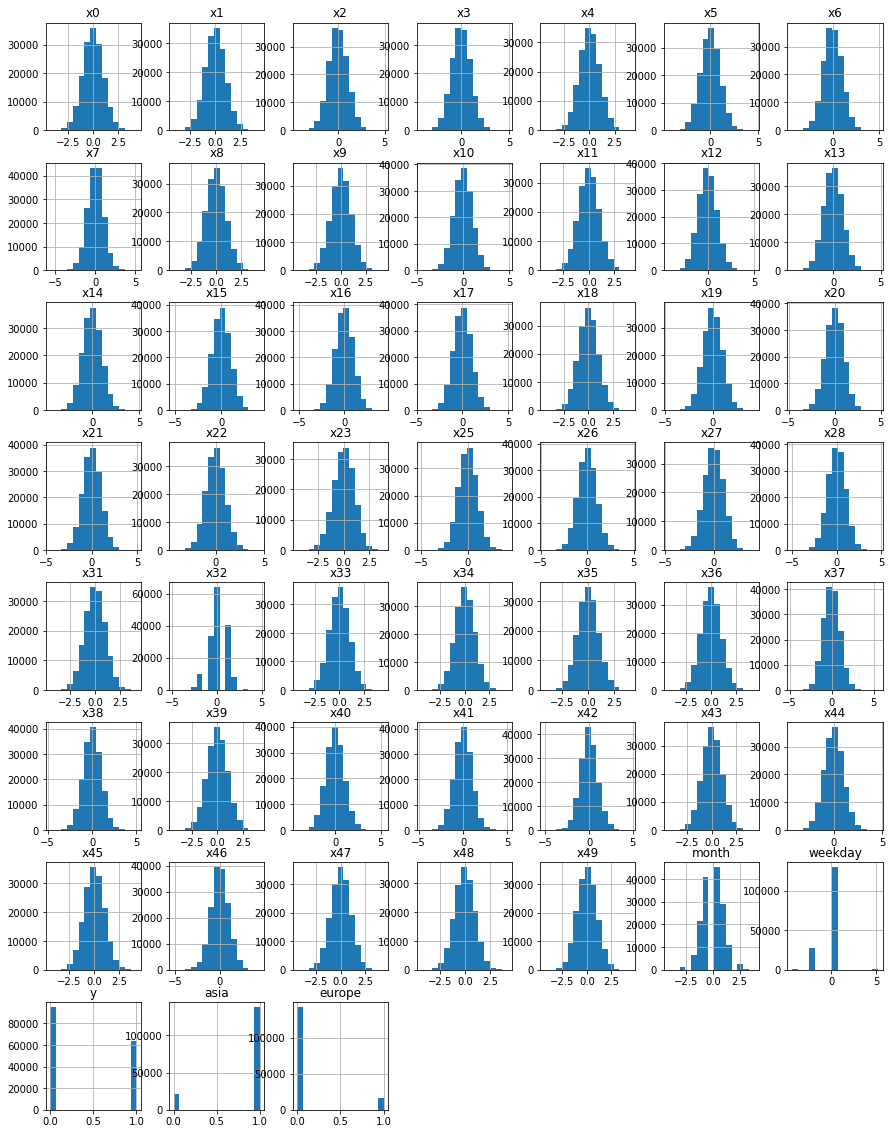

In [28]:
anonymized_scaled.hist(bins=15, figsize=(15,20))


## Split into 80% Training, 10% Validation, 10% test sets

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, holdback_index in split.split(anonymized_scaled, anonymized_scaled.y):
    training_df = anonymized_scaled.iloc[train_index]
    holdback_df = anonymized_scaled.iloc[holdback_index]

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for validation_index, test_index in split.split(holdback_df, holdback_df.y):
    validation_df = holdback_df.iloc[validation_index]
    test_df = holdback_df.iloc[test_index]

print("Size of training set: ",training_df.shape)
print("Size of validation set: ",validation_df.shape)
print("Size of test set: ",test_df.shape)

Size of training set:  (126713, 52)
Size of validation set:  (15839, 52)
Size of test set:  (15840, 52)


In [31]:
train_features = training_df.drop(['y'],axis=1).values #droping target
train_labels = training_df['y'].values

validation_features = validation_df.drop(['y'],axis=1).values #droping target
validation_labels = validation_df['y'].values

test_features = test_df.drop(['y'],axis=1).values #droping target
test_labels = test_df['y'].values

Setup a cross validation strategy

In [32]:
from sklearn.model_selection import StratifiedKFold

num_cv_iterations = 5
cv_object = StratifiedKFold(n_splits=num_cv_iterations, shuffle=True, random_state=27)

## Define custom scoring metric for costs of incorrect predictions

In [33]:
from sklearn.metrics import confusion_matrix

incorrect_0 = 100
incorrect_1 = 250

def calculate_cost(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    weight = np.array([[0, incorrect_0], [incorrect_1, 0]])
    out = cm * weight
    return out.sum()/cm.sum() #Returns Cost/Observation, not total cost 


In [34]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


scorer = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'cost': make_scorer(calculate_cost, greater_is_better=False)
}

### Note that this is treated as loss in the scorer so costs will be shown as negative values

* when using calculate_cost() function on validation or test predictions the value will be shown as positive value

### Run base Random Forest Model (default parameters) to double check functionality of custom scorer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

cv_results = sklearn.model_selection.cross_validate(rf, train_features, train_labels, cv=cv_object, scoring=scorer, return_estimator=True, n_jobs=6) 
print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Recall = ",cv_results['test_recall'].mean())
print("Mean Precision = ",cv_results['test_precision'].mean())
print("Mean Cost = ",cv_results['test_cost'].mean())


from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Mean Accuracy =  0.921089396748647
Mean Recall =  0.8688160996178917
Mean Precision =  0.9299048705753611
Mean Cost =  -15.785671646489138
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
rf = RandomForestClassifier()

training_model = rf.fit(train_features,train_labels)
rf_validation_predictions = training_model.predict(validation_features)

In [ ]:
from sklearn.metrics import roc_auc_score

print("Validation Set Accuracy: ", accuracy_score(validation_labels, rf_validation_predictions))
print("Validation Set Precision: ", precision_score(validation_labels, rf_validation_predictions))
print("Validation Set Recall: ", recall_score(validation_labels, rf_validation_predictions))
print("Validation Set AUC: ", roc_auc_score(validation_labels, rf_validation_predictions))
print("Validation Set Cost: ", calculate_cost(validation_labels, rf_validation_predictions))


Validation Set Accuracy:  0.9214596881116232
Validation Set Precision:  0.9269719251336899
Validation Set Recall:  0.8729933899905571
Validation Set AUC:  0.9134603217744035
Validation Set Cost:  15.496559126207462


In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion(cf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    x_axis_labels = ['0','1']
    y_axis_labels = ['0','1']
    ax = plt.axes()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title('    Confusion Matrix\n')
    plt.xlabel("Predicted Category")
    plt.ylabel("True Category")

cm = confusion_matrix(validation_labels,rf_validation_predictions)
plot_confusion(cm)

True 0 / Predicted 1 = 437 misclassified * $100 = $43,700
True 1 / Predicted 0 = 807 miscalssified * $250 = $201,750
Total Cost = $245,450
 
Observations in validation set = 15,839

Cost per observations = $15.50

Manual Calculation matches output of custom scoring function

## Tune a Random Forest Model using grid search of parameters with scoring optimized on cost function

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import time

rf = RandomForestClassifier()

num_searches = 20

params = {
        'criterion':['gini','entropy'],
        'max_depth':[20,25,30,40],
        'min_samples_split':[10,8,6,4],
        'min_samples_leaf':[4,2,1],
        'max_features':['auto','sqrt','log2']        
        }


rs_rf = RandomizedSearchCV(rf, param_distributions=params, n_iter=num_searches, scoring=make_scorer(calculate_cost, greater_is_better=False), n_jobs=6, cv=cv_object, verbose=3, random_state=42)
print("Randomized search..")
search_time_start = time.time()
rs_rf.fit(train_features, train_labels)
print("Randomized search time:", time.time() - search_time_start)

Randomized search..
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 5/5] END criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=8;, score=-15.496 total time= 1.1min
[CV 4/5] END criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=8;, score=-15.847 total time= 1.2min
[CV 2/5] END criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=8;, score=-16.249 total time= 1.2min
[CV 1/5] END criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=8;, score=-16.125 total time= 1.2min
[CV 3/5] END criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=8;, score=-15.278 total time= 1.2min
[CV 1/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8;, score=-16.093 total time= 1.3min
[CV 2/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samp

In [ ]:
rs_rf_results = pd.DataFrame.from_dict(rs_rf.cv_results_)
rs_rf_results = rs_rf_results.sort_values(by=['mean_test_score'], ascending=False)
rs_rf_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,79.283996,0.612737,0.434445,0.009421,8,1,sqrt,30,entropy,"{'min_samples_split': 8, 'min_samples_leaf': 1...",-15.572347,-15.446080,-15.075169,-15.338174,-15.140873,-15.314529,0.185356,1
17,79.286459,0.346711,0.441777,0.007041,10,1,auto,30,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",-15.578266,-15.609833,-15.207355,-15.109305,-15.296741,-15.360300,0.200103,2
10,78.781028,0.456701,0.437492,0.003107,6,2,auto,30,entropy,"{'min_samples_split': 6, 'min_samples_leaf': 2...",-15.698615,-15.844612,-15.388865,-15.107332,-15.198090,-15.447503,0.283589,3
2,78.617360,0.193581,0.432353,0.006493,10,2,auto,40,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",-15.576293,-15.842639,-15.369135,-15.351985,-15.440770,-15.516165,0.181360,4
6,69.114552,0.538772,0.466850,0.009391,6,1,auto,25,gini,"{'min_samples_split': 6, 'min_samples_leaf': 1...",-15.451999,-15.797262,-15.548672,-15.424986,-15.533502,-15.551284,0.131633,5
12,69.546290,0.374643,0.467534,0.014853,10,1,auto,40,gini,"{'min_samples_split': 10, 'min_samples_leaf': ...",-15.657183,-16.012311,-15.298110,-15.393418,-15.488122,-15.569829,0.251018,6
8,68.817014,0.201880,0.459052,0.008585,8,2,auto,30,gini,"{'min_samples_split': 8, 'min_samples_leaf': 2...",-15.905773,-15.803180,-15.353352,-15.456554,-15.817615,-15.667295,0.219501,7
9,77.755012,0.356474,0.436995,0.015562,4,4,sqrt,25,entropy,"{'min_samples_split': 4, 'min_samples_leaf': 4...",-15.783451,-16.075445,-15.489484,-15.507853,-15.588746,-15.688996,0.219514,8
3,67.659684,0.159473,0.471164,0.024647,6,2,auto,25,gini,"{'min_samples_split': 6, 'min_samples_leaf': 2...",-16.168173,-16.069526,-15.300083,-15.456554,-15.517718,-15.702411,0.348750,9
15,77.861124,0.531864,0.430226,0.008762,10,4,auto,30,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",-15.953123,-15.937340,-15.361244,-15.967564,-15.450635,-15.733981,0.269502,10


### Default RF cost was $15.49, tuned RF cost is $15.31

Best Parameters were: 

min_samples_split = 8

min_samples_leaf = 1

max_features = 'sqrt'

max_depth = 30

criterion = 'entropy'

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_tuned = RandomForestClassifier(min_samples_split = 8, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 30, criterion = 'entropy')

rf_tuned_model = rf_tuned.fit(train_features,train_labels)
rf_tuned_predictions = rf_tuned_model.predict(validation_features)

In [36]:
print("Validation Set Accuracy: ", accuracy_score(validation_labels, rf_tuned_predictions))
print("Validation Set Precision: ", precision_score(validation_labels, rf_tuned_predictions))
print("Validation Set Recall: ", recall_score(validation_labels, rf_tuned_predictions))
print("Validation Set Cost: ", calculate_cost(validation_labels, rf_tuned_predictions))

Validation Set Accuracy:  0.9245533177599596
Validation Set Precision:  0.9288445552784705
Validation Set Recall:  0.8792886370790054
Validation Set Cost:  14.808384367699981


In [37]:
rf_tuned_probs = rf_tuned_model.predict_proba(validation_features)
rf_tuned_probs[:,1]

array([0.10042857, 0.90737698, 0.22638961, ..., 0.75240476, 0.01433333,
       0.82669444])

In [135]:
rf1_cutoff_summary = pd.DataFrame(columns = ['Cutoff', 'Money_loss'])

for cutoff in np.arange(0.0,1.0,0.01):
    predictions = [int(p>=cutoff) for p in rf_tuned_probs[:,1]]
    loss = calculate_cost(validation_labels, predictions)
    rf1_cutoff_summary = rf1_cutoff_summary.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)

rf1_cutoff_summary = rf1_cutoff_summary.sort_values(by=['Money_loss'], ascending=True)

rf1_cutoff_summary.head()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/337604283.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rf1_cutoff_summary = rf1_cutoff_summary.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/337604283.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rf1_cutoff_summary = rf1_cutoff_summary.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/337604283.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rf1_cutoff_summary = rf1_cutoff_summary.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5l

,Cutoff,Money_loss
37,0.37,11.077088
38,0.38,11.127596
36,0.36,11.193889
39,0.39,11.323316
35,0.35,11.462214


## Make final RF predictions on test set

In [139]:
rf1_test_probs = rf_tuned_model.predict_proba(test_features)
rf1_test_probs[:,1]
rf1_predictions = [int(p>=0.37) for p in rf1_test_probs[:,1]]
print("Validation Set Accuracy: ", accuracy_score(test_labels, rf1_predictions))
print("Validation Set Precision: ", precision_score(test_labels, rf1_predictions))
print("Validation Set Recall: ", recall_score(test_labels, rf1_predictions))
print("Validation Set Cost: ", calculate_cost(test_labels, rf1_predictions))


Validation Set Accuracy:  0.9176767676767676
Validation Set Precision:  0.8602196548281272
Validation Set Recall:  0.9490165224232887
Validation Set Cost:  11.30050505050505


In [39]:
rf_test_probs = rf_tuned_model.predict_proba(test_features)
rf_test_probs[:,1]

array([0.5752096 , 0.15694444, 0.10541667, ..., 0.27914358, 0.54585174,
       0.41167316])

# First tuned model (Random Forest) has test set money loss of **$11.30**

## Tune an XGBoost Model using grid search of parameters with scoring optimized on cost function

In [40]:
import xgboost as xgb

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [41]:
from xgboost import XGBClassifier

XGBC_defaults = XGBClassifier(cv=cv_object)

XGBC_defaults.fit(train_features, train_labels, eval_set=[[validation_features,validation_labels]], eval_metric='logloss', early_stopping_rounds=5)

XGBC_defaults_predictions = XGBC_defaults.predict(validation_features)

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:14:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.59286
[1]	validation_0-logloss:0.52824
[2]	validation_0-logloss:0.48575
[3]	validation_0-logloss:0.44946
[4]	validation_0-logloss:0.42423
[5]	validation_0-logloss:0.40368
[6]	validation_0-logloss:0.38566
[7]	validation_0-logloss:0.37140
[8]	validation_0-logloss:0.35751
[9]	validation_0-logloss:0.34874
[10]	validation_0-logloss:0.33741
[11]	validation_0-logloss:0.33229
[12]	validation_0-logloss:0.31929
[13]	validation_0-logloss:0.31375
[14]	validation_0-logloss:0.30501
[15]	validation_0-logloss:0.30047
[16]	validation_0-logloss:0.29506
[17]	validatio

In [42]:
print("Validation Set Accuracy: ", accuracy_score(validation_labels, XGBC_defaults_predictions))
print("Validation Set Precision: ", precision_score(validation_labels, XGBC_defaults_predictions))
print("Validation Set Recall: ", recall_score(validation_labels, XGBC_defaults_predictions))
print("Validation Set Cost: ", calculate_cost(validation_labels, XGBC_defaults_predictions))

from pprint import pprint
print('Parameters currently in use:\n')
pprint(XGBC_defaults.get_params())

Validation Set Accuracy:  0.9253109413473073
Validation Set Precision:  0.9126895450917797
Validation Set Recall:  0.8999055712936733
Validation Set Cost:  13.492013384683377
Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'cv': StratifiedKFold(n_splits=5, random_state=27, shuffle=True),
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': True,
 'validate_parameters': 1,
 'verbosity': None}


## XGB Hyperparameter grid search search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import time

xgb_clf = XGBClassifier(use_label_encoder=False)

num_searches = 40

params2 = {
        'n_estimators':[50, 100, 150, 200],
        'max_depth':[5,10,15,20,25,30],
        'min_child_weight': [1, 5, 10],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
        'subsample': [0.6, 0.8, 1.0],
        'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
        'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
        'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]
        }

fit_params = {
'early_stopping_rounds': 5,
'eval_metric': 'logloss',
'eval_set': [[validation_features,validation_labels]]
}


rs_clf2 = RandomizedSearchCV(xgb_clf, param_distributions=params2, n_iter=num_searches, scoring=make_scorer(calculate_cost, greater_is_better=False), n_jobs=6, cv=cv_object, verbose=3, random_state=42)
print("Randomized search..")
search_time_start = time.time()
rs_clf2.fit(train_features, train_labels, **fit_params)
print("Randomized search time:", time.time() - search_time_start)

Randomized search..
Fitting 5 folds for each of 40 candidates, totalling 200 fits


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning

[0]	validation_0-logloss:0.59308
[0]	validation_0-logloss:0.59385
[0]	validation_0-logloss:0.59553
[0]	validation_0-logloss:0.59489
[0]	validation_0-logloss:0.59450
[0]	validation_0-logloss:0.62572
[1]	validation_0-logloss:0.53052
[1]	validation_0-logloss:0.53175
[1]	validation_0-logloss:0.53469
[1]	validation_0-logloss:0.53558
[1]	validation_0-logloss:0.53508
[1]	validation_0-logloss:0.56979
[2]	validation_0-logloss:0.49238
[2]	validation_0-logloss:0.49048
[2]	validation_0-logloss:0.49460
[2]	validation_0-logloss:0.49712
[2]	validation_0-logloss:0.49688
[2]	validation_0-logloss:0.52480
[3]	validation_0-logloss:0.46798
[3]	validation_0-logloss:0.46129
[3]	validation_0-logloss:0.46024
[3]	validation_0-logloss:0.46175
[3]	validation_0-logloss:0.45782
[3]	validation_0-logloss:0.48784
[4]	validation_0-logloss:0.43578
[4]	validation_0-logloss:0.44168
[4]	validation_0-logloss:0.44425
[4]	validation_0-logloss:0.43775
[4]	validation_0-logloss:0.43598
[4]	validation_0-logloss:0.45642
[5]	valida

rs2_results = pd.DataFrame.from_dict(rs_clf2.cv_results_)
rs2_results = rs2_results.sort_values(by=['mean_test_score'], ascending=False)
rs2_results.head(10)



# Best XGB parameters:

param_subsample = 0.6

param_reg_lambda = 12.8

param_reg_alpha = 3.2

param_n_estimators = 150

param_min_child_weight = 5

param_max_depth = 25

param_learning_rate = 0.15

param_gamma = 0.8

param_colsample_bytree = 1.0

							

In [43]:
import xgboost as xgb
from xgboost import XGBClassifier

XGBC_tuned = XGBClassifier(use_label_encoder=False, subsample = 0.6, reg_lambda = 12.8, reg_alpha = 3.2, n_estimators = 150, min_child_weight = 5, max_depth = 25, learning_rate = 0.15, gamma = 0.8, colsample_bytree = 1.0,scoring=make_scorer(calculate_cost, greater_is_better=False), n_jobs=6, cv=cv_object, verbose=3, random_state=42)

XGBC_tuned.fit(train_features, train_labels, eval_set=[[validation_features,validation_labels]], eval_metric='logloss', early_stopping_rounds=5)



[06:15:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.62455
[1]	validation_0-logloss:0.56859
[2]	validation_0-logloss:0.52288
[3]	validation_0-logloss:0.48468
[4]	validation_0-logloss:0.45169
[5]	validation_0-logloss:0.42243
[6]	validation_0-logloss:0.39945
[7]	validation_0-logloss:0.37896
[8]	validation_0-logloss:0.36023
[9]	validation_0-logloss:0.34491
[10]	validation_0-logloss:0.33073
[11]	validation_0-logloss:0.31758
[12]	validation_0-logloss:0.30637
[13]	validation_0-logloss:0.29538
[14]	validation_0-logloss:0.28551
[15]	validation_0-logloss:0.27686
[16]	validation_0-logloss:0.26890
[17

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              cv=StratifiedKFold(n_splits=5, random_state=27, shuffle=True),
              enable_categorical=False, gamma=0.8, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=25,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=6, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=3.2, reg_lambda=12.8,
              scale_pos_weight=1,
              scoring=make_scorer(calculate_cost, greater_is_better=False),
              subsample=0.6, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [44]:
XGBC_tuned_predictions = XGBC_tuned.predict(validation_features)

In [45]:
print("Validation Set Accuracy: ", accuracy_score(validation_labels, XGBC_tuned_predictions))
print("Validation Set Precision: ", precision_score(validation_labels, XGBC_tuned_predictions))
print("Validation Set Recall: ", recall_score(validation_labels, XGBC_tuned_predictions))
print("Validation Set Cost: ", calculate_cost(validation_labels, XGBC_tuned_predictions))

Validation Set Accuracy:  0.9367384304564682
Validation Set Precision:  0.9277493606138107
Validation Set Recall:  0.9134403525338369
Validation Set Cost:  11.53481911736852


## Default XGB validation cost was $13.49, tuned XGB validation cost is $11.53

In [140]:
XGBC_tuned_probs = XGBC_tuned.predict_proba(validation_features)
XGBC_tuned_probs[:,1]

XGBC1_cutoff_summary = pd.DataFrame(columns = ['Cutoff', 'Money_loss'])

for cutoff in np.arange(0.0,1.0,0.01):
    predictions = [int(p>=cutoff) for p in XGBC_tuned_probs[:,1]]
    loss = calculate_cost(validation_labels, predictions)
    XGBC1_cutoff_summary = XGBC1_cutoff_summary.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)

XGBC1_cutoff_summary = XGBC1_cutoff_summary.sort_values(by=['Money_loss'], ascending=True)

XGBC1_cutoff_summary.head()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/1486340758.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  XGBC1_cutoff_summary = XGBC1_cutoff_summary.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/1486340758.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  XGBC1_cutoff_summary = XGBC1_cutoff_summary.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/1486340758.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  XGBC1_cutoff_summary = XGBC1_cutoff_summary.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/fo

,Cutoff,Money_loss
29,0.29,9.700739
27,0.27,9.713366
30,0.3,9.741777
28,0.28,9.75756
31,0.31,9.770188


## Make final predictions on test set

In [143]:
XGBC_test_probs = XGBC_tuned.predict_proba(test_features)
XGBC_test_predictions = [int(p>=0.29) for p in XGBC_test_probs[:,1]]
print("Validation Set Accuracy: ", accuracy_score(test_labels, XGBC_test_predictions))
print("Validation Set Precision: ", precision_score(test_labels, XGBC_test_predictions))
print("Validation Set Recall: ", recall_score(test_labels, XGBC_test_predictions))
print("Validation Set Cost: ", calculate_cost(test_labels, XGBC_test_predictions))

Validation Set Accuracy:  0.9336489898989899
Validation Set Precision:  0.8851292477490561
Validation Set Recall:  0.959087332808812
Validation Set Cost:  9.097222222222221


In [48]:
XGBC_test_probs = XGBC_tuned.predict_proba(test_features)
XGBC_test_probs[:,1]

array([0.8369972 , 0.05214395, 0.01383528, ..., 0.44250953, 0.6317235 ,
       0.17264652], dtype=float32)

# Second tuned model (XGBoost) has test set money loss of **$9.09**
### This is an improvement vs the $11.30 achieved with Random Forest

## Tune a Neural Network Model using grid search of parameters with scoring optimized on cost function

In [49]:
# TensorFlow and tf.keras
import tensorflow as tf

print(tf.__version__)

2.8.0


In [50]:
tf.random.set_seed(1234)

In [51]:
train_features.shape

(126713, 51)

In [52]:
callback = [
  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10,mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.05)
]

gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(51,)),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

gelu_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features, train_labels, batch_size=50, epochs=5,  validation_data=[validation_features, validation_labels]) #callbacks=callback,

test_loss, test_acc = gelu_model.evaluate(validation_features,  validation_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/5


2022-04-07 06:15:53.714328: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-07 06:15:53.714623: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-07 06:15:53.891006: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-04-07 

2535/2535 [==============================] - ETA: 0s - loss: 0.2232 - accuracy: 0.9094

2022-04-07 06:16:13.355840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 20s 8ms/step - loss: 0.2232 - accuracy: 0.9094 - val_loss: 0.1501 - val_accuracy: 0.9451
Epoch 2/5
2535/2535 [==============================] - 20s 8ms/step - loss: 0.1281 - accuracy: 0.9559 - val_loss: 0.1242 - val_accuracy: 0.9564
Epoch 3/5
2535/2535 [==============================] - 20s 8ms/step - loss: 0.1058 - accuracy: 0.9649 - val_loss: 0.1107 - val_accuracy: 0.9608
Epoch 4/5
2535/2535 [==============================] - 21s 8ms/step - loss: 0.0921 - accuracy: 0.9701 - val_loss: 0.1032 - val_accuracy: 0.9650
Epoch 5/5
2535/2535 [==============================] - 20s 8ms/step - loss: 0.0819 - accuracy: 0.9739 - val_loss: 0.1032 - val_accuracy: 0.9669
4/4 - 0s - loss: 0.1032 - accuracy: 0.9669 - 88ms/epoch - 22ms/step

Test accuracy: 0.9668540358543396


In [53]:
NN_predictions = gelu_model.predict(validation_features)

NN_prediction_labels = [int(p>=0.5) for p in NN_predictions]



2022-04-07 06:17:35.899380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [54]:
print("Validation Set Accuracy: ", accuracy_score(validation_labels, NN_prediction_labels))
print("Validation Set Precision: ", precision_score(validation_labels, NN_prediction_labels))
print("Validation Set Recall: ", recall_score(validation_labels, NN_prediction_labels))
print("Validation Set Cost: ", calculate_cost(validation_labels, NN_prediction_labels))

Validation Set Accuracy:  0.9668539680535387
Validation Set Precision:  0.952211016291699
Validation Set Recall:  0.9658482845451684
Validation Set Cost:  5.369657175326725


## First NN tried without tuning has cost of $5.37, focus on tuning this model now

In [55]:
%rm -rf ./logs/

In [56]:
%load_ext tensorboard


In [57]:
#Add early stopping
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=5,
    verbose=3,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [58]:
from tensorflow.keras.callbacks import TensorBoard
from time import time
tb = TensorBoard(log_dir=f"logs\\{time()}")

In [59]:
from tensorboard.plugins.hparams import api as hp

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([100, 300])) 
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.0, 0.1, 0.2])) #[0.0, 0.2]
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam'])) #['adam', 'sgd']
HP_ACTIVATION = hp.HParam('activation', hp.Discrete(['gelu', 'selu', 'swish', 'relu', 'tanh']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning/').as_default():
  hp.hparams_config(
    hparams=[HP_ACTIVATION, HP_DROPOUT, HP_OPTIMIZER, HP_NUM_UNITS],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )


In [60]:

def train_test_model(hparams):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax),
  ])
  model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )

  model.fit(train_features, train_labels, callbacks=callback, batch_size=50, epochs=25, validation_data=[validation_features, validation_labels]) # Run with 1 epoch to speed things up for demo purposes
  _, accuracy = model.evaluate(validation_features, validation_labels, batch_size=50, ) #callbacks=[tf.keras.callbacks.TensorBoard('logs/hparam_tuning'),hp.KerasCallback('logs/hparam_tuning', hparams)]
  return accuracy

In [61]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [ ]:
%rm -rf ./logs/

session_num = 0

for activation in HP_ACTIVATION.domain.values: 
  for dropout_rate in HP_DROPOUT.domain.values:
    for optimizer in HP_OPTIMIZER.domain.values:
      for num_units in HP_NUM_UNITS.domain.values:
        hparams = {
          HP_ACTIVATION: activation,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
          HP_NUM_UNITS: num_units
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'activation': 'gelu', 'dropout': 0.0, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/25


2022-04-05 22:25:27.523131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - ETA: 0s - loss: 0.2291 - accuracy: 0.9069

2022-04-05 22:25:49.299053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 23s 9ms/step - loss: 0.2291 - accuracy: 0.9069 - val_loss: 0.1417 - val_accuracy: 0.9477
Epoch 2/25
2535/2535 [==============================] - 20s 8ms/step - loss: 0.1301 - accuracy: 0.9538 - val_loss: 0.1222 - val_accuracy: 0.9569
Epoch 3/25
2535/2535 [==============================] - 20s 8ms/step - loss: 0.1083 - accuracy: 0.9637 - val_loss: 0.1138 - val_accuracy: 0.9612
Epoch 4/25
2535/2535 [==============================] - 21s 8ms/step - loss: 0.0950 - accuracy: 0.9685 - val_loss: 0.1064 - val_accuracy: 0.9649
Epoch 5/25
2535/2535 [==============================] - 20s 8ms/step - loss: 0.0852 - accuracy: 0.9725 - val_loss: 0.1172 - val_accuracy: 0.9625
Epoch 6/25
2535/2535 [==============================] - 20s 8ms/step - loss: 0.0766 - accuracy: 0.9764 - val_loss: 0.1072 - val_accuracy: 0.9648
Epoch 7/25
2535/2535 [==============================] - 20s 8ms/step - loss: 0.0686 - accuracy: 0.9788 - val_loss: 0.1140 - val_accuracy: 0.9

2022-04-05 22:28:34.401965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - ETA: 0s - loss: 0.2435 - accuracy: 0.9003

2022-04-05 22:28:57.382880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 24s 9ms/step - loss: 0.2435 - accuracy: 0.9003 - val_loss: 0.1581 - val_accuracy: 0.9425
Epoch 2/25
2535/2535 [==============================] - 23s 9ms/step - loss: 0.1449 - accuracy: 0.9482 - val_loss: 0.1170 - val_accuracy: 0.9593
Epoch 3/25
2535/2535 [==============================] - 24s 10ms/step - loss: 0.1186 - accuracy: 0.9596 - val_loss: 0.1121 - val_accuracy: 0.9616
Epoch 4/25
2535/2535 [==============================] - 23s 9ms/step - loss: 0.1061 - accuracy: 0.9646 - val_loss: 0.1043 - val_accuracy: 0.9658
Epoch 5/25
2535/2535 [==============================] - 23s 9ms/step - loss: 0.0981 - accuracy: 0.9680 - val_loss: 0.0992 - val_accuracy: 0.9669
Epoch 6/25
2535/2535 [==============================] - 24s 9ms/step - loss: 0.0908 - accuracy: 0.9709 - val_loss: 0.1032 - val_accuracy: 0.9673
Epoch 7/25
2535/2535 [==============================] - 23s 9ms/step - loss: 0.0868 - accuracy: 0.9726 - val_loss: 0.1006 - val_accuracy: 0.

2022-04-05 22:33:44.061958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - ETA: 0s - loss: 0.2665 - accuracy: 0.8902

2022-04-05 22:34:07.316867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 25s 10ms/step - loss: 0.2665 - accuracy: 0.8902 - val_loss: 0.1660 - val_accuracy: 0.9381
Epoch 2/25
2535/2535 [==============================] - 23s 9ms/step - loss: 0.1585 - accuracy: 0.9424 - val_loss: 0.1265 - val_accuracy: 0.9570
Epoch 3/25
2535/2535 [==============================] - 24s 9ms/step - loss: 0.1331 - accuracy: 0.9541 - val_loss: 0.1179 - val_accuracy: 0.9582
Epoch 4/25
2535/2535 [==============================] - 23s 9ms/step - loss: 0.1201 - accuracy: 0.9596 - val_loss: 0.1109 - val_accuracy: 0.9643
Epoch 5/25
2535/2535 [==============================] - 24s 9ms/step - loss: 0.1122 - accuracy: 0.9628 - val_loss: 0.1109 - val_accuracy: 0.9626
Epoch 6/25
2535/2535 [==============================] - 24s 10ms/step - loss: 0.1060 - accuracy: 0.9653 - val_loss: 0.1029 - val_accuracy: 0.9663
Epoch 7/25
2535/2535 [==============================] - 25s 10ms/step - loss: 0.1010 - accuracy: 0.9677 - val_loss: 0.1031 - val_accuracy: 

2022-04-05 22:39:19.801264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2531/2535 [============================>.] - ETA: 0s - loss: 0.2372 - accuracy: 0.9038

2022-04-05 22:39:36.168656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 19s 7ms/step - loss: 0.2370 - accuracy: 0.9039 - val_loss: 0.1629 - val_accuracy: 0.9384
Epoch 2/25
2535/2535 [==============================] - 17s 7ms/step - loss: 0.1407 - accuracy: 0.9502 - val_loss: 0.1346 - val_accuracy: 0.9530
Epoch 3/25
2535/2535 [==============================] - 17s 7ms/step - loss: 0.1159 - accuracy: 0.9612 - val_loss: 0.1300 - val_accuracy: 0.9534
Epoch 4/25
2535/2535 [==============================] - 17s 7ms/step - loss: 0.1028 - accuracy: 0.9664 - val_loss: 0.1129 - val_accuracy: 0.9610
Epoch 5/25
2535/2535 [==============================] - 16s 6ms/step - loss: 0.0931 - accuracy: 0.9704 - val_loss: 0.1130 - val_accuracy: 0.9609
Epoch 6/25
2535/2535 [==============================] - 16s 6ms/step - loss: 0.0854 - accuracy: 0.9735 - val_loss: 0.1169 - val_accuracy: 0.9624
Epoch 7/25
2535/2535 [==============================] - 16s 6ms/step - loss: 0.0785 - accuracy: 0.9762 - val_loss: 0.1131 - val_accuracy: 0.9

2022-04-05 22:43:30.567896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - ETA: 0s - loss: 0.2606 - accuracy: 0.8931

2022-04-05 22:43:50.411170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 21s 8ms/step - loss: 0.2606 - accuracy: 0.8931 - val_loss: 0.1681 - val_accuracy: 0.9381
Epoch 2/25
2535/2535 [==============================] - 19s 8ms/step - loss: 0.1602 - accuracy: 0.9413 - val_loss: 0.1459 - val_accuracy: 0.9496
Epoch 3/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1364 - accuracy: 0.9534 - val_loss: 0.1387 - val_accuracy: 0.9508
Epoch 4/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1235 - accuracy: 0.9585 - val_loss: 0.1253 - val_accuracy: 0.9577
Epoch 5/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1117 - accuracy: 0.9629 - val_loss: 0.1153 - val_accuracy: 0.9595
Epoch 6/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1057 - accuracy: 0.9658 - val_loss: 0.1186 - val_accuracy: 0.9620
Epoch 7/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.0979 - accuracy: 0.9687 - val_loss: 0.1113 - val_accuracy: 0.9

2022-04-05 22:50:06.093851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - ETA: 0s - loss: 0.2849 - accuracy: 0.8806

2022-04-05 22:50:25.391983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 20s 8ms/step - loss: 0.2849 - accuracy: 0.8806 - val_loss: 0.1894 - val_accuracy: 0.9287
Epoch 2/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1784 - accuracy: 0.9337 - val_loss: 0.1515 - val_accuracy: 0.9449
Epoch 3/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1521 - accuracy: 0.9466 - val_loss: 0.1386 - val_accuracy: 0.9525
Epoch 4/25
2535/2535 [==============================] - 19s 8ms/step - loss: 0.1363 - accuracy: 0.9533 - val_loss: 0.1283 - val_accuracy: 0.9561
Epoch 5/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1252 - accuracy: 0.9577 - val_loss: 0.1157 - val_accuracy: 0.9600
Epoch 6/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1180 - accuracy: 0.9612 - val_loss: 0.1156 - val_accuracy: 0.9616
Epoch 7/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1124 - accuracy: 0.9629 - val_loss: 0.1140 - val_accuracy: 0.9

2022-04-05 22:57:04.006986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - ETA: 0s - loss: 0.2615 - accuracy: 0.8959

2022-04-05 22:57:39.668176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 38s 15ms/step - loss: 0.2615 - accuracy: 0.8959 - val_loss: 0.1816 - val_accuracy: 0.9303
Epoch 2/25
2535/2535 [==============================] - 38s 15ms/step - loss: 0.1572 - accuracy: 0.9439 - val_loss: 0.1534 - val_accuracy: 0.9451
Epoch 3/25
2535/2535 [==============================] - 38s 15ms/step - loss: 0.1353 - accuracy: 0.9542 - val_loss: 0.1350 - val_accuracy: 0.9549
Epoch 4/25
2535/2535 [==============================] - 39s 15ms/step - loss: 0.1220 - accuracy: 0.9592 - val_loss: 0.1151 - val_accuracy: 0.9628
Epoch 5/25
2535/2535 [==============================] - 38s 15ms/step - loss: 0.1118 - accuracy: 0.9633 - val_loss: 0.1514 - val_accuracy: 0.9517
Epoch 6/25
2535/2535 [==============================] - 39s 15ms/step - loss: 0.1051 - accuracy: 0.9667 - val_loss: 0.1281 - val_accuracy: 0.9593
Epoch 7/25
2535/2535 [==============================] - 38s 15ms/step - loss: 0.0998 - accuracy: 0.9686 - val_loss: 0.0957 - val_accura

2022-04-05 23:04:47.952875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - ETA: 0s - loss: 0.2938 - accuracy: 0.8808

2022-04-05 23:05:28.008701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 42s 17ms/step - loss: 0.2938 - accuracy: 0.8808 - val_loss: 0.1846 - val_accuracy: 0.9300
Epoch 2/25
2535/2535 [==============================] - 39s 15ms/step - loss: 0.1792 - accuracy: 0.9349 - val_loss: 0.1485 - val_accuracy: 0.9457
Epoch 3/25
2535/2535 [==============================] - 40s 16ms/step - loss: 0.1528 - accuracy: 0.9468 - val_loss: 0.1247 - val_accuracy: 0.9567
Epoch 4/25
2535/2535 [==============================] - 39s 15ms/step - loss: 0.1362 - accuracy: 0.9543 - val_loss: 0.1490 - val_accuracy: 0.9506
Epoch 5/25
2535/2535 [==============================] - 39s 15ms/step - loss: 0.1252 - accuracy: 0.9591 - val_loss: 0.1131 - val_accuracy: 0.9641
Epoch 6/25
2535/2535 [==============================] - 38s 15ms/step - loss: 0.1178 - accuracy: 0.9618 - val_loss: 0.1145 - val_accuracy: 0.9633
Epoch 7/25
2535/2535 [==============================] - 38s 15ms/step - loss: 0.1124 - accuracy: 0.9644 - val_loss: 0.0956 - val_accura

2022-04-05 23:18:47.880109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - ETA: 0s - loss: 0.3314 - accuracy: 0.8635

2022-04-05 23:19:24.503618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 39s 15ms/step - loss: 0.3314 - accuracy: 0.8635 - val_loss: 0.2140 - val_accuracy: 0.9163
Epoch 2/25
2535/2535 [==============================] - 37s 15ms/step - loss: 0.2037 - accuracy: 0.9241 - val_loss: 0.1598 - val_accuracy: 0.9445
Epoch 3/25
2535/2535 [==============================] - 37s 15ms/step - loss: 0.1734 - accuracy: 0.9383 - val_loss: 0.1310 - val_accuracy: 0.9547
Epoch 4/25
2535/2535 [==============================] - 37s 15ms/step - loss: 0.1543 - accuracy: 0.9468 - val_loss: 0.1298 - val_accuracy: 0.9552
Epoch 5/25
2535/2535 [==============================] - 38s 15ms/step - loss: 0.1425 - accuracy: 0.9526 - val_loss: 0.1134 - val_accuracy: 0.9622
Epoch 6/25
2535/2535 [==============================] - 38s 15ms/step - loss: 0.1342 - accuracy: 0.9560 - val_loss: 0.1266 - val_accuracy: 0.9578
Epoch 7/25
2535/2535 [==============================] - 39s 16ms/step - loss: 0.1270 - accuracy: 0.9586 - val_loss: 0.1022 - val_accura

2022-04-05 23:30:22.295364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - ETA: 0s - loss: 0.2437 - accuracy: 0.8997

2022-04-05 23:30:41.795713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 21s 8ms/step - loss: 0.2437 - accuracy: 0.8997 - val_loss: 0.1616 - val_accuracy: 0.9380
Epoch 2/25
2535/2535 [==============================] - 19s 8ms/step - loss: 0.1353 - accuracy: 0.9527 - val_loss: 0.1255 - val_accuracy: 0.9549
Epoch 3/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1105 - accuracy: 0.9624 - val_loss: 0.1071 - val_accuracy: 0.9633
Epoch 4/25
2535/2535 [==============================] - 18s 7ms/step - loss: 0.0960 - accuracy: 0.9686 - val_loss: 0.1072 - val_accuracy: 0.9627
Epoch 5/25
2535/2535 [==============================] - 18s 7ms/step - loss: 0.0869 - accuracy: 0.9722 - val_loss: 0.1040 - val_accuracy: 0.9660
Epoch 6/25
2535/2535 [==============================] - 18s 7ms/step - loss: 0.0803 - accuracy: 0.9745 - val_loss: 0.1064 - val_accuracy: 0.9651
Epoch 7/25
2535/2535 [==============================] - 19s 8ms/step - loss: 0.0744 - accuracy: 0.9766 - val_loss: 0.1044 - val_accuracy: 0.9

2022-04-05 23:33:34.406833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - ETA: 0s - loss: 0.2623 - accuracy: 0.8904

2022-04-05 23:33:54.875459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 23s 8ms/step - loss: 0.2623 - accuracy: 0.8904 - val_loss: 0.1684 - val_accuracy: 0.9379
Epoch 2/25
2535/2535 [==============================] - 21s 8ms/step - loss: 0.1491 - accuracy: 0.9464 - val_loss: 0.1250 - val_accuracy: 0.9546
Epoch 3/25
2535/2535 [==============================] - 20s 8ms/step - loss: 0.1248 - accuracy: 0.9569 - val_loss: 0.1112 - val_accuracy: 0.9625
Epoch 4/25
2535/2535 [==============================] - 20s 8ms/step - loss: 0.1113 - accuracy: 0.9628 - val_loss: 0.1040 - val_accuracy: 0.9646
Epoch 5/25
2535/2535 [==============================] - 20s 8ms/step - loss: 0.1029 - accuracy: 0.9661 - val_loss: 0.1001 - val_accuracy: 0.9672
Epoch 6/25
2535/2535 [==============================] - 21s 8ms/step - loss: 0.0968 - accuracy: 0.9686 - val_loss: 0.1048 - val_accuracy: 0.9647
Epoch 7/25
2535/2535 [==============================] - 22s 9ms/step - loss: 0.0919 - accuracy: 0.9705 - val_loss: 0.0982 - val_accuracy: 0.9

2022-04-05 23:39:10.707837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - ETA: 0s - loss: 0.2880 - accuracy: 0.8781

2022-04-05 23:39:32.389492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 23s 9ms/step - loss: 0.2880 - accuracy: 0.8781 - val_loss: 0.1769 - val_accuracy: 0.9323
Epoch 2/25
2535/2535 [==============================] - 21s 8ms/step - loss: 0.1679 - accuracy: 0.9383 - val_loss: 0.1325 - val_accuracy: 0.9525
Epoch 3/25
2535/2535 [==============================] - 21s 8ms/step - loss: 0.1387 - accuracy: 0.9511 - val_loss: 0.1154 - val_accuracy: 0.9592
Epoch 4/25
2535/2535 [==============================] - 20s 8ms/step - loss: 0.1246 - accuracy: 0.9575 - val_loss: 0.1097 - val_accuracy: 0.9633
Epoch 5/25
2535/2535 [==============================] - 21s 8ms/step - loss: 0.1165 - accuracy: 0.9612 - val_loss: 0.1083 - val_accuracy: 0.9629
Epoch 6/25
2535/2535 [==============================] - 22s 9ms/step - loss: 0.1084 - accuracy: 0.9643 - val_loss: 0.1039 - val_accuracy: 0.9662
Epoch 7/25
2535/2535 [==============================] - 21s 8ms/step - loss: 0.1031 - accuracy: 0.9662 - val_loss: 0.1037 - val_accuracy: 0.9

2022-04-05 23:44:31.196625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2533/2535 [============================>.] - ETA: 0s - loss: 0.2345 - accuracy: 0.9047

2022-04-05 23:44:48.414125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 18s 7ms/step - loss: 0.2345 - accuracy: 0.9047 - val_loss: 0.1638 - val_accuracy: 0.9386
Epoch 2/25
2535/2535 [==============================] - 16s 7ms/step - loss: 0.1356 - accuracy: 0.9526 - val_loss: 0.1449 - val_accuracy: 0.9487
Epoch 3/25
2535/2535 [==============================] - 16s 6ms/step - loss: 0.1172 - accuracy: 0.9605 - val_loss: 0.1204 - val_accuracy: 0.9600
Epoch 4/25
2535/2535 [==============================] - 16s 6ms/step - loss: 0.1063 - accuracy: 0.9646 - val_loss: 0.1157 - val_accuracy: 0.9612
Epoch 5/25
2535/2535 [==============================] - 17s 7ms/step - loss: 0.0985 - accuracy: 0.9678 - val_loss: 0.1154 - val_accuracy: 0.9610
Epoch 6/25
2535/2535 [==============================] - 17s 7ms/step - loss: 0.0922 - accuracy: 0.9700 - val_loss: 0.1055 - val_accuracy: 0.9662
Epoch 7/25
2535/2535 [==============================] - 17s 7ms/step - loss: 0.0872 - accuracy: 0.9721 - val_loss: 0.1038 - val_accuracy: 0.9

2022-04-05 23:48:42.098321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - ETA: 0s - loss: 0.2785 - accuracy: 0.8839

2022-04-05 23:49:01.812010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 21s 8ms/step - loss: 0.2785 - accuracy: 0.8839 - val_loss: 0.1703 - val_accuracy: 0.9386
Epoch 2/25
2535/2535 [==============================] - 19s 8ms/step - loss: 0.1528 - accuracy: 0.9453 - val_loss: 0.1277 - val_accuracy: 0.9550
Epoch 3/25
2535/2535 [==============================] - 19s 8ms/step - loss: 0.1292 - accuracy: 0.9550 - val_loss: 0.1135 - val_accuracy: 0.9613
Epoch 4/25
2535/2535 [==============================] - 20s 8ms/step - loss: 0.1170 - accuracy: 0.9605 - val_loss: 0.1087 - val_accuracy: 0.9629
Epoch 5/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1105 - accuracy: 0.9631 - val_loss: 0.1124 - val_accuracy: 0.9629
Epoch 6/25
2535/2535 [==============================] - 19s 8ms/step - loss: 0.1037 - accuracy: 0.9651 - val_loss: 0.1046 - val_accuracy: 0.9655
Epoch 7/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1006 - accuracy: 0.9671 - val_loss: 0.1029 - val_accuracy: 0.9

2022-04-05 23:55:08.570540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - ETA: 0s - loss: 0.3251 - accuracy: 0.8584

2022-04-05 23:55:28.368409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 21s 8ms/step - loss: 0.3251 - accuracy: 0.8584 - val_loss: 0.2034 - val_accuracy: 0.9234
Epoch 2/25
2535/2535 [==============================] - 19s 8ms/step - loss: 0.1742 - accuracy: 0.9359 - val_loss: 0.1601 - val_accuracy: 0.9431
Epoch 3/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1436 - accuracy: 0.9491 - val_loss: 0.1194 - val_accuracy: 0.9593
Epoch 4/25
2535/2535 [==============================] - 20s 8ms/step - loss: 0.1295 - accuracy: 0.9550 - val_loss: 0.1180 - val_accuracy: 0.9578
Epoch 5/25
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1213 - accuracy: 0.9590 - val_loss: 0.1108 - val_accuracy: 0.9621
Epoch 6/25
2535/2535 [==============================] - 19s 8ms/step - loss: 0.1146 - accuracy: 0.9615 - val_loss: 0.1015 - val_accuracy: 0.9655
Epoch 7/25
2535/2535 [==============================] - 19s 8ms/step - loss: 0.1088 - accuracy: 0.9637 - val_loss: 0.0962 - val_accuracy: 0.9

In [62]:
callback = [
  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001),
  tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0.0001,patience=10,verbose=3,mode='auto',baseline=None,restore_best_weights=True)
]

tuned_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='selu', input_shape=(51,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='selu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='selu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='selu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='selu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

tuned_model1.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
tuned_model1.fit(train_features, train_labels, batch_size=50, epochs=100, callbacks=callback, validation_data=[validation_features, validation_labels]) #callbacks=callback,

test_loss, test_acc = tuned_model1.evaluate(validation_features, validation_labels, batch_size=50, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-04-07 06:17:37.805342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2534/2535 [============================>.] - ETA: 0s - loss: 0.2810 - accuracy: 0.8852

2022-04-07 06:18:18.037190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 42s 16ms/step - loss: 0.2810 - accuracy: 0.8852 - val_loss: 0.1696 - val_accuracy: 0.9347 - lr: 0.0010
Epoch 2/100
2535/2535 [==============================] - 40s 16ms/step - loss: 0.1687 - accuracy: 0.9388 - val_loss: 0.1394 - val_accuracy: 0.9513 - lr: 0.0010
Epoch 3/100
2535/2535 [==============================] - 40s 16ms/step - loss: 0.1454 - accuracy: 0.9492 - val_loss: 0.1339 - val_accuracy: 0.9542 - lr: 0.0010
Epoch 4/100
2535/2535 [==============================] - 40s 16ms/step - loss: 0.1320 - accuracy: 0.9558 - val_loss: 0.1225 - val_accuracy: 0.9580 - lr: 0.0010
Epoch 5/100
2535/2535 [==============================] - 39s 16ms/step - loss: 0.1220 - accuracy: 0.9601 - val_loss: 0.1140 - val_accuracy: 0.9616 - lr: 0.0010
Epoch 6/100
2535/2535 [==============================] - 39s 16ms/step - loss: 0.1154 - accuracy: 0.9628 - val_loss: 0.1108 - val_accuracy: 0.9649 - lr: 0.0010
Epoch 7/100
2535/2535 [=============================

In [63]:
NN_predictions2 = tuned_model1.predict(validation_features)
NN_prediction_labels2 = [int(p>=0.5) for p in NN_predictions2]
print("Validation Set Accuracy: ", accuracy_score(validation_labels, NN_prediction_labels2))
print("Validation Set Precision: ", precision_score(validation_labels, NN_prediction_labels2))
print("Validation Set Recall: ", recall_score(validation_labels, NN_prediction_labels2))
print("Validation Set Cost: ", calculate_cost(validation_labels, NN_prediction_labels2))


2022-04-07 06:41:56.866762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Validation Set Accuracy:  0.9766399393901131
Validation Set Precision:  0.970292360892801
Validation Set Recall:  0.9715140069247717
Validation Set Cost:  4.0501294273628385


## Tuned model has monely loss of $4.05 per observation (Accuracy=97.66%)

## Write loop for cutoff vs cost to see where we're at

<AxesSubplot:>

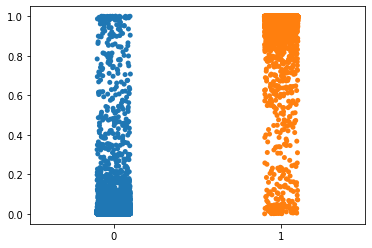

In [64]:
#NN_predictions2
#validation_labels

def flatten(t):
    return [item for sublist in t for item in sublist]

NN_predictions2_flattened = flatten(NN_predictions2)

sns.stripplot(x=validation_labels, y=NN_predictions2_flattened,jitter=True,)

In [65]:
cutoff_summary = pd.DataFrame(columns = ['Cutoff', 'Money_loss'])

for cutoff in np.arange(0.0,1.0,0.01):
    predictions = [int(p>=cutoff) for p in NN_predictions2]
    loss = calculate_cost(validation_labels, predictions)
    cutoff_summary = cutoff_summary.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)

cutoff_summary = cutoff_summary.sort_values(by=['Money_loss'], ascending=True)

cutoff_summary.head()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/237157211.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_summary = cutoff_summary.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/237157211.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_summary = cutoff_summary.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/237157211.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_summary = cutoff_summary.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn

,Cutoff,Money_loss
33,0.33,3.873351
30,0.3,3.876507
36,0.36,3.879664
31,0.31,3.885978
32,0.32,3.889134


### Optimizing cutoff gets money loss per observation down to $3.87 (at 0.34 cutoff)

## Make NN predictions on test set

In [134]:
NN_test_predictions = tuned_model1.predict(test_features)
NN_test_prediction_labels = [int(p>=0.33) for p in NN_test_predictions]
print("Test Set Accuracy: ", accuracy_score(test_labels, NN_test_prediction_labels))
print("Test Set Precision: ", precision_score(test_labels, NN_test_prediction_labels))
print("Test Set Recall: ", recall_score(test_labels, NN_test_prediction_labels))
print("Test Set Cost: ", calculate_cost(test_labels, NN_test_prediction_labels))

Test Set Accuracy:  0.9743686868686868
Test Set Precision:  0.9626691553896407
Test Set Recall:  0.9738788355625492
Test Set Cost:  4.13510101010101


# Third tuned model (NN) has test set money Loss of **$4.13** on test set
### This is an improvement vs the $11.30 achieved with Random Forest and $9.09 on XGBoost


## Ensemble models using out of fold predictions

In [112]:
## NN-tuned out-of-of fold predictions (validation set)
NN_oof = NN_predictions2_flattened

## XGB-tuned out-of-fold predicitions (validation set)
XBGC_oof = XGBC_tuned_probs[:,1]

## RF-tuned out-of-fold predicitions (validation set)
RF_oof = rf_tuned_probs[:,1]

In [113]:
print(NN_oof[0:9])
print(XBGC_oof[0:9])
print(RF_oof[0:9])

[0.0039756713, 0.9693955, 0.01805845, 0.0088188, 0.011270686, 0.030698275, 0.006589688, 0.9999701, 0.999416]
[0.04866934 0.9662743  0.01782823 0.01032976 0.01775923 0.11505203
 0.02567232 0.99451655 0.99294734]
[0.10042857 0.90737698 0.22638961 0.00285714 0.08731818 0.34683658
 0.1642583  0.95422222 0.96222222]


In [114]:
level2_data = pd.DataFrame()
level2_data['NN'] = NN_oof
level2_data['XGB'] = XBGC_oof
level2_data['RF'] = RF_oof
level2_data.head()

,NN,XGB,RF
0,0.003976,0.048669,0.100429
1,0.969396,0.966274,0.907377
2,0.018058,0.017828,0.226390
3,0.008819,0.010330,0.002857
4,0.011271,0.017759,0.087318


## Create Level-2 data for test set

In [115]:
NN_test_predictions_flattened = flatten(NN_test_predictions)


level2_test = pd.DataFrame()
level2_test['NN'] = NN_test_predictions_flattened
level2_test['XGB'] = XGBC_test_probs[:,1]
level2_test['RF'] = rf_test_probs[:,1]
level2_test.head()

,NN,XGB,RF
0,0.908389,0.836997,0.575210
1,0.031872,0.052144,0.156944
2,0.005336,0.013835,0.105417
3,0.014160,0.054979,0.111649
4,0.998730,0.919476,0.849558


## Use level-2 data in LinearRegression ensemble

In [116]:
from sklearn.linear_model import LinearRegression

linear_final_oof = LinearRegression()
linear_final_oof.fit(level2_data,validation_labels)

LinearRegression()

In [117]:
linear_ensemble_val_probs = linear_final_oof.predict(level2_data)
linear_ensemble_val_probs[0:9]

array([-7.24611400e-04,  9.70753562e-01,  9.51152258e-03,  1.80408742e-03,
        4.06116509e-03,  2.75207672e-02, -3.32593614e-04,  1.00131400e+00,
        1.00062359e+00])

In [118]:
linear_ensemble_val_labels = [int(p>=0.5) for p in linear_ensemble_val_probs]


In [119]:
linear_ensemble_val_labels[0:9]

[0, 1, 0, 0, 0, 0, 0, 1, 1]

In [120]:
print("Validation Set Accuracy: ", accuracy_score(validation_labels, linear_ensemble_val_labels))
print("Validation Set Precision: ", precision_score(validation_labels, linear_ensemble_val_labels))
print("Validation Set Recall: ", recall_score(validation_labels, linear_ensemble_val_labels))
print("Validation Set Cost: ", calculate_cost(validation_labels, linear_ensemble_val_labels))

Validation Set Accuracy:  0.9767030746890587
Validation Set Precision:  0.9705928605126593
Validation Set Recall:  0.9713566257475605
Validation Set Cost:  4.053286192310121


In [121]:
linear_cutoff = pd.DataFrame(columns = ['Cutoff', 'Money_loss'])

for cutoff in np.arange(0.0,1.0,0.01):
    predictions = [int(p>=cutoff) for p in linear_ensemble_val_probs]
    loss = calculate_cost(validation_labels, predictions)
    linear_cutoff = linear_cutoff.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)

linear_cutoff = linear_cutoff.sort_values(by=['Money_loss'], ascending=True)

linear_cutoff.head()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/4021129464.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  linear_cutoff = linear_cutoff.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/4021129464.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  linear_cutoff = linear_cutoff.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/4021129464.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  linear_cutoff = linear_cutoff.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/

,Cutoff,Money_loss
36,0.36,3.860724
32,0.32,3.867037
22,0.22,3.876507
37,0.37,3.876507
33,0.33,3.879664


## Shifting linear ensemble cutoff to 0.36, ensemble money loss improves to **$3.86** on validation set

## Use enseble fit to make predictions on test set

In [122]:
linear_ensemble_test_probs = linear_final_oof.predict(level2_test)
linear_ensemble_test_labels = [int(p>=0.36) for p in linear_ensemble_test_probs]

print("Test Set Accuracy: ", accuracy_score(test_labels, linear_ensemble_test_labels))
print("Test Set Precision: ", precision_score(test_labels, linear_ensemble_test_labels))
print("Test Set Recall: ", recall_score(test_labels, linear_ensemble_test_labels))
print("Test Set Cost: ", calculate_cost(test_labels, linear_ensemble_test_labels))



Test Set Accuracy:  0.975
Test Set Precision:  0.9654741446648961
Test Set Recall:  0.9724626278520849
Test Set Cost:  4.15719696969697


# Test Set Money Loss = **$4.15** with linear regression ensemble

## Use level-2 data in LogisticRegression ensemble

In [123]:
from sklearn.linear_model import LogisticRegression

logistic_final_oof = LogisticRegression()
logistic_final_oof.fit(level2_data,validation_labels)

LogisticRegression()

In [124]:
logistic_ensemble_val_probs = logistic_final_oof.predict_proba(level2_data)
logistic_ensemble_val_probs[0:9]

array([[0.99154191, 0.00845809],
       [0.01097869, 0.98902131],
       [0.98879091, 0.01120909],
       [0.99306908, 0.00693092],
       [0.9916916 , 0.0083084 ],
       [0.9826616 , 0.0173384 ],
       [0.99062901, 0.00937099],
       [0.00790504, 0.99209496],
       [0.00783595, 0.99216405]])

In [125]:
logistic_ensemble_val_probs[:,1]

array([0.00845809, 0.98902131, 0.01120909, ..., 0.98497889, 0.00675326,
       0.98977394])

In [126]:
logistic_ensemble_val_labels = [int(p>=0.5) for p in logistic_ensemble_val_probs[:,1]]
logistic_ensemble_val_labels[0:9]

[0, 1, 0, 0, 0, 0, 0, 1, 1]

In [127]:
print("Validation Set Accuracy: ", accuracy_score(validation_labels, logistic_ensemble_val_labels))
print("Validation Set Precision: ", precision_score(validation_labels, logistic_ensemble_val_labels))
print("Validation Set Recall: ", recall_score(validation_labels, logistic_ensemble_val_labels))
print("Validation Set Cost: ", calculate_cost(validation_labels, logistic_ensemble_val_labels))

Validation Set Accuracy:  0.9770818864827325
Validation Set Precision:  0.9718065837139707
Validation Set Recall:  0.9710418633931381
Validation Set Cost:  4.034345602626429


In [128]:
logistic_cutoff = pd.DataFrame(columns = ['Cutoff', 'Money_loss'])

for cutoff in np.arange(0.0,1.0,0.01):
    predictions = [int(p>=cutoff) for p in logistic_ensemble_val_probs[:,1]]
    loss = calculate_cost(validation_labels, predictions)
    logistic_cutoff = logistic_cutoff.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)

logistic_cutoff = logistic_cutoff.sort_values(by=['Money_loss'], ascending=True)

logistic_cutoff.head()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/2356862223.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  logistic_cutoff = logistic_cutoff.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/2356862223.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  logistic_cutoff = logistic_cutoff.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/2356862223.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  logistic_cutoff = logistic_cutoff.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49q

,Cutoff,Money_loss
28,0.28,3.84494
29,0.29,3.84494
27,0.27,3.848096
26,0.26,3.86388
25,0.25,3.879664


### Logistic Regression ensemble shifting cutoff to 0.28, ensemble money loss improves to $3.84 on validation set

In [129]:
logistic_ensemble_test_probs = logistic_final_oof.predict_proba(level2_test)
logistic_ensemble_test_labels = [int(p>=0.28) for p in logistic_ensemble_test_probs[:,1]]

print("Test Set Accuracy: ", accuracy_score(test_labels, logistic_ensemble_test_labels))
print("Test Set Precision: ", precision_score(test_labels, logistic_ensemble_test_labels))
print("Test Set Recall: ", recall_score(test_labels, logistic_ensemble_test_labels))
print("Test Set Cost: ", calculate_cost(test_labels, logistic_ensemble_test_labels))

Test Set Accuracy:  0.9758838383838384
Test Set Precision:  0.967883440388532
Test Set Recall:  0.9721479150275374
Test Set Cost:  4.087752525252525


# Test Set Money Loss = **$4.08** with logistic regression ensemble

## Use level-2 data in Neural Net ensemble

In [105]:
callback = [
  tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10,verbose=3,mode='auto',baseline=None,restore_best_weights=True)
]

ensemble_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

ensemble_model1.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
ensemble_model1.fit(level2_data.values, validation_labels, batch_size=50, epochs=100, callbacks=callback)

test_loss, test_acc = ensemble_model1.evaluate(level2_data.values, validation_labels, batch_size=50, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-04-07 07:44:15.649725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


317/317 [==============================] - 3s 8ms/step - loss: 0.1363 - accuracy: 0.9644
Epoch 2/100
317/317 [==============================] - 2s 7ms/step - loss: 0.0959 - accuracy: 0.9755
Epoch 3/100
317/317 [==============================] - 2s 7ms/step - loss: 0.0927 - accuracy: 0.9765
Epoch 4/100
317/317 [==============================] - 2s 7ms/step - loss: 0.0890 - accuracy: 0.9763
Epoch 5/100
317/317 [==============================] - 2s 7ms/step - loss: 0.0915 - accuracy: 0.9761
Epoch 6/100
317/317 [==============================] - 2s 8ms/step - loss: 0.0889 - accuracy: 0.9769
Epoch 7/100
317/317 [==============================] - 2s 7ms/step - loss: 0.0878 - accuracy: 0.9763
Epoch 8/100
317/317 [==============================] - 2s 7ms/step - loss: 0.0886 - accuracy: 0.9767
Epoch 9/100
317/317 [==============================] - 2s 7ms/step - loss: 0.0878 - accuracy: 0.9759
Epoch 10/100
317/317 [==============================] - 2s 7ms/step - loss: 0.0863 - accuracy: 0.9771
E

2022-04-07 07:45:23.081780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


317/317 - 1s - loss: 0.0785 - accuracy: 0.9770 - 958ms/epoch - 3ms/step

Test accuracy: 0.9770188331604004


In [106]:
NN_ensemble_probs = ensemble_model1.predict(level2_data.values)
NN_ensemble_labels = [int(p>=0.5) for p in NN_ensemble_probs]
print("Validation Set Accuracy: ", accuracy_score(validation_labels, NN_ensemble_labels))
print("Validation Set Precision: ", precision_score(validation_labels, NN_ensemble_labels))
print("Validation Set Recall: ", recall_score(validation_labels, NN_ensemble_labels))
print("Validation Set Cost: ", calculate_cost(validation_labels, NN_ensemble_labels))

2022-04-07 07:45:34.349094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Validation Set Accuracy:  0.9770187511837869
Validation Set Precision:  0.9734429339234903
Validation Set Recall:  0.9691532892666037
Validation Set Cost:  4.154302670623146


In [107]:
NN_cutoff = pd.DataFrame(columns = ['Cutoff', 'Money_loss'])

for cutoff in np.arange(0.0,1.0,0.01):
    predictions = [int(p>=cutoff) for p in NN_ensemble_probs]
    loss = calculate_cost(validation_labels, predictions)
    NN_cutoff = NN_cutoff.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)

RF_cutoff = NN_cutoff.sort_values(by=['Money_loss'], ascending=True)

RF_cutoff.head()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/3912859855.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NN_cutoff = NN_cutoff.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/3912859855.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NN_cutoff = NN_cutoff.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/3912859855.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NN_cutoff = NN_cutoff.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_94468/39128598

,Cutoff,Money_loss
27,0.27,3.822842
24,0.24,3.84494
32,0.32,3.848096
28,0.28,3.851253
21,0.21,3.860724


## Optimal cutoff based on validation set is 0.27, ensemble money loss for validation improves to **$3.82**

## Use ensemble to make predictions on test set

In [133]:
Test_ensemble_probs = ensemble_model1.predict(level2_test.values)
Test_ensemble_labels = [int(p>=0.27) for p in Test_ensemble_probs]
print("Validation Set Accuracy: ", accuracy_score(test_labels, Test_ensemble_labels))
print("Validation Set Precision: ", precision_score(test_labels, Test_ensemble_labels))
print("Validation Set Recall: ", recall_score(test_labels, Test_ensemble_labels))
print("Validation Set Cost: ", calculate_cost(test_labels, Test_ensemble_labels))

Validation Set Accuracy:  0.9746212121212121
Validation Set Precision:  0.9611154144074361
Validation Set Recall:  0.9762391817466561
Validation Set Cost:  3.9678030303030303


# NN ensemble has Money Lost = **$3.97** on test set.
# This is best model with improvement over individual best model that had $4.13 money loss